# Importing Libraries

In [1]:
from __future__ import division
import numpy as np
from scipy.misc import imread
import os

# Declaration of Variables

In [2]:
X = np.load("train_samples.npy")

X = X/127

N = X.shape[0]

D = X.shape[1]
# No. of hidden nodes in the network
M = 10
# learning rate
r = 0.001

iterations = 300

# sparsity constraint
p = 0.001 

lam = 0.01

noise = 1e-4

# Definitions of required functions

In [3]:
# sigmoid of given array or value
def sigmoid(arr):
    return 1/(1+np.exp(-arr))
# derivative of sigmoid
def diff_sigmoid(arr):
    return (sigmoid(arr)-(sigmoid(arr)**2))
# argument to sigmoid function above that are required in the algorithm
def arg_sigmoid(arr,w_arr,bias):
    return np.matmul(arr,w_arr) + bias

# Initialization of Parameters

In [4]:
alpha = np.random.normal(0,noise,(D, M))

alpha_bias = np.random.normal(0,noise,(1, M))

beta = np.random.normal(0,noise,(M, D))

beta_bias = np.random.normal(0,noise,(1, D))

gamma = np.random.normal(0,noise,(D, M))

gamma_bias = np.random.normal(0,noise,(1, M))

# Gradient Descent

In [14]:
for i in range(iterations):
    
    mu_mat = arg_sigmoid(X,alpha,alpha_bias)
    mu = sigmoid(mu_mat)
    
    sigma_mat = arg_sigmoid(X,alpha,alpha_bias)
    sigma = sigmoid(sigma_mat)
    
#     z = np.multiply((np.asmatrix(np.random.multivariate_normal(np.zeros(M) , noise*np.eye(M)))) , np.exp(0.5*sigma)) + mu
    z = np.multiply(np.repeat(np.asmatrix((np.random.multivariate_normal(np.zeros(M) , np.eye(M)))), N, axis = 0), np.exp(0.5*sigma)) + mu
    print(z.shape)
#     z_bias = np.ones((1, M))
#     z_mat = arg_sigmoid(X,alpha,alpha_bias)
#     z = sigmoid(z_mat)
    
    yhat_mat = arg_sigmoid(z,beta,beta_bias)
    
    X_hat = sigmoid(yhat_mat)
    
    delta = np.array((X_hat - X))*diff_sigmoid(np.array(yhat_mat))
#     delta2 = arg_sigmoid(z,delta, z_bias)
    
    b_bias = np.sum(delta, axis = 0).reshape((1, D))
    
    b = np.matmul(z.T,delta)
    
#     zm = np.mean(z,axis = 0)
# constraint due to sparsity condition    
#     constraint = (lam)*(-p/zm + (1-p)/(1-zm))*diff_sigmoid(z_mat)
    
    s_m_alpha = (diff_sigmoid(mu_mat)*np.matmul(delta,beta.T))
    
    a_bias = np.sum(s_m_alpha,axis=0).reshape((1, M))
    
    a = np.matmul(X.T,s_m_alpha) + np.matmul(X.T, np.matmul(mu, diff_sigmoid(mu_mat)))
    
    s_m_gamma = (diff_sigmoid(sigma_mat)*np.matmul(delta,beta.T))
    
    g_bias = np.sum(s_m_gamma,axis=0).reshape((1, M))
    
    g = np.matmul(X.T,0.5*np.matmul(s_m_gamma, np.exp(0.5*sigma))) + np.matmul(np.exp(sigma), diff_sigmoid(sigma_mat)) - diff_sigmoid(sigma_mat)
# Backpropagation    
    alpha = alpha - r*a
    
    alpha_bias = alpha_bias - r*a_bias
    
    beta = beta - r*b
    
    beta_bias = beta_bias - r*b_bias
    
    gamma = gamma - r*g
    
    gamma_bias = gamma_bias - r*g_bias
    
# z_mat = arg_sigmoid(X,alpha,alpha_bias)

# z = sigmoid(z_mat)

yhat_mat = arg_sigmoid(z,beta,beta_bias)

X_hat = sigmoid(yhat_mat)

X_hat = X_hat*127

(600, 10)


ValueError: shapes (600,10) and (600,10) not aligned: 10 (dim 1) != 600 (dim 0)

# Actual Input vs Estimated Input

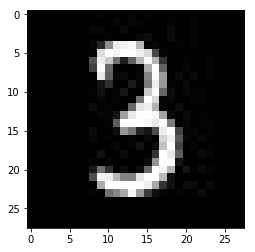

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X[0,:].reshape(28,28) , cmap='gray')

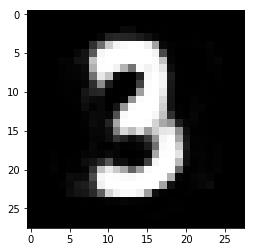

In [11]:
plt.imshow(X_hat[0,:].reshape(28,28), cmap = 'gray')

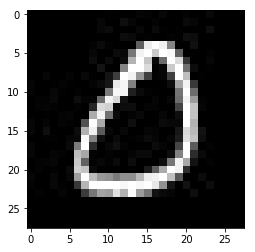

In [12]:
plt.imshow(X[1,:].reshape(28,28) , cmap='gray')

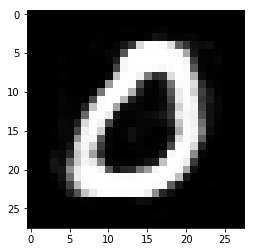

In [13]:
plt.imshow(X_hat[1,:].reshape(28,28) , cmap='gray')

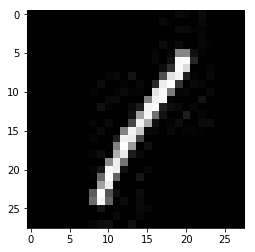

In [14]:
plt.imshow(X[2,:].reshape(28,28) , cmap='gray')

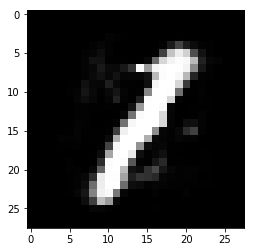

In [15]:
plt.imshow(X_hat[2,:].reshape(28,28) , cmap='gray')

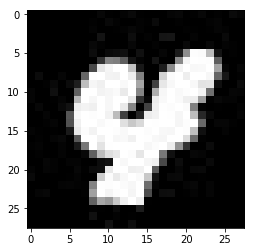

In [17]:
plt.imshow(X[4,:].reshape(28,28) , cmap='gray')

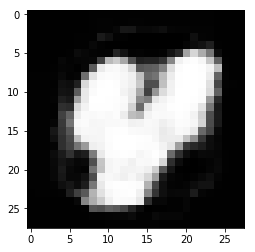

In [18]:
plt.imshow(X_hat[4,:].reshape(28,28) , cmap='gray')